In [63]:
import backtrader as bt
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [69]:
class maCross(bt.Strategy):

    def __init__(self):
        '''
        Create an dictionary of indicators so that we can dynamically add the
        indicators to the strategy using a loop. This mean the strategy will
        work with any numner of data feeds. 
        '''
        self.inds = dict()
        
        for i, d in enumerate(self.datas):
            
            self.inds[d] = dict()
            
            self.inds[d]['open_zema'] = bt.indicators.ZeroLagIndicator(d.open, period=5, gainlimit=50, _movav='EMA', plot=False)
            self.inds[d]['close_zema'] = bt.indicators.ZeroLagIndicator(d.close, period=5, gainlimit=50, _movav='EMA', plot=False)
            
            self.inds[d]['buysig'] = bt.indicators.CrossUp(self.inds[d]['close_zema'], self.inds[d]['open_zema'], plot=False)
            self.inds[d]['sellsig'] = bt.indicators.CrossDown(self.inds[d]['open_zema'], self.inds[d]['close_zema'], plot=False)
            
            d.plotinfo.plot = True
            d.plotinfo.plotmaster = self.datas[0]
                  
    def next(self):
        for i, d in enumerate(self.datas):
            dt, dn = self.datetime.date(), d._name
            pos = self.getposition(d).size
            if not pos:  # no market / no orders
                if self.inds[d]['buysig'][0] == 1: # Buy
                    self.buy(data=d)
                elif self.inds[d]['sellsig'][0] == -1: # Sell
                    self.sell(data=d)
            else:
                if self.inds[d]['sellsig'][0] == -1: # Sell
                    self.close(data=d)
                    self.buy(data=d)
                elif self.inds[d]['buysig'][0] == 1: # Buy
                    self.close(data=d)
                    self.sell(data=d)
                    
    def notify_trade(self, trade):
        dt = self.data.datetime.date()
        if trade.isclosed:
            print('{} {} Closed: PnL Gross {}, Net {}'.format(
                                                dt,
                                                trade.data._name,
                                                round(trade.pnl,2),
                                                round(trade.pnlcomm,2)))

In [70]:
class BinanceCSVData(bt.feeds.GenericCSVData):
    params = (
        ('nullvalue', float('NaN')),
        ('dtformat', '%Y-%m-%d %H:%M:%S'),
        ('datetime', 0),
        ('time', -1),
        ('open', 1),
        ('high', 2),
        ('low', 3),
        ('close', 4),
        ('volume', 5),
        ('compression', 720),
        ('openinterest', -1),
    )

In [71]:
#Variable for our starting cash
startcash = 2000

#Create an instance of cerebro
cerebro = bt.Cerebro()

#Add our strategy
cerebro.addstrategy(maCross)

#create our data list
datalist = [
    ('BTC_USDT_12H_2019_10_21', 'BTCUSDT'), #[0] = Data file, [1] = Data name
    ('ETH_USDT_12H_2019_10_21', 'ETHUSDT'),
    ('LTC_USDT_12H_2019_10_21', 'LTCUSDT'),
]

#Loop through the list adding to cerebro.
for i in range(len(datalist)):
    data = BinanceCSVData(dataname=datalist[i][0],timeframe=bt.TimeFrame.Minutes, compression= 720)
    cerebro.adddata(data, name=datalist[i][1])
    
    
# Plot Buys & Sells
cerebro.addobservermulti(bt.observers.BuySell, plot=True)

#Drawdown Plot
#cerebro.addobserver(bt.observers.DrawDown,plot=True)

# Set our desired cash start
cerebro.broker.setcash(startcash)

# Desired Risk % Per Trade 
cerebro.addsizer(bt.sizers.PercentSizer, percents=10)

#Plot Cash
cerebro.addobserver(bt.observers.broker.Value, plot=True)

# Run over everything
cerebro.run(stdstats=False)

#Get final portfolio Value
portvalue = cerebro.broker.getvalue()
pnl = portvalue - startcash

2017-12-17 ETHUSDT Closed: PnL Gross 11.42, Net 11.42
2017-12-17 LTCUSDT Closed: PnL Gross 17.01, Net 17.01
2017-12-18 BTCUSDT Closed: PnL Gross 11.54, Net 11.54
2017-12-18 ETHUSDT Closed: PnL Gross -6.32, Net -6.32
2017-12-18 LTCUSDT Closed: PnL Gross -2.49, Net -2.49
2017-12-20 BTCUSDT Closed: PnL Gross 16.34, Net 16.34
2017-12-20 LTCUSDT Closed: PnL Gross -9.11, Net -9.11
2017-12-21 BTCUSDT Closed: PnL Gross 7.22, Net 7.22
2017-12-21 ETHUSDT Closed: PnL Gross -27.68, Net -27.68
2017-12-21 LTCUSDT Closed: PnL Gross 16.75, Net 16.75
2017-12-23 BTCUSDT Closed: PnL Gross 28.4, Net 28.4
2017-12-23 ETHUSDT Closed: PnL Gross 56.85, Net 56.85
2017-12-23 LTCUSDT Closed: PnL Gross 41.12, Net 41.12
2017-12-25 BTCUSDT Closed: PnL Gross -1.56, Net -1.56
2017-12-25 ETHUSDT Closed: PnL Gross -7.19, Net -7.19
2017-12-25 LTCUSDT Closed: PnL Gross -8.1, Net -8.1
2017-12-26 BTCUSDT Closed: PnL Gross -12.06, Net -12.06
2017-12-26 ETHUSDT Closed: PnL Gross -22.71, Net -22.71
2017-12-26 LTCUSDT Closed: P

2018-07-21 ETHUSDT Closed: PnL Gross 6.88, Net 6.88
2018-07-21 LTCUSDT Closed: PnL Gross 3.61, Net 3.61
2018-07-22 BTCUSDT Closed: PnL Gross 0.18, Net 0.18
2018-07-23 BTCUSDT Closed: PnL Gross -2.65, Net -2.65
2018-07-23 ETHUSDT Closed: PnL Gross -1.61, Net -1.61
2018-07-23 LTCUSDT Closed: PnL Gross -1.0, Net -1.0
2018-07-24 BTCUSDT Closed: PnL Gross -5.05, Net -5.05
2018-07-24 ETHUSDT Closed: PnL Gross -3.92, Net -3.92
2018-07-24 LTCUSDT Closed: PnL Gross -2.85, Net -2.85
2018-07-26 ETHUSDT Closed: PnL Gross 1.06, Net 1.06
2018-07-26 LTCUSDT Closed: PnL Gross 1.11, Net 1.11
2018-07-26 BTCUSDT Closed: PnL Gross 0.02, Net 0.02
2018-07-27 BTCUSDT Closed: PnL Gross 2.88, Net 2.88
2018-07-27 ETHUSDT Closed: PnL Gross 2.81, Net 2.81
2018-07-28 LTCUSDT Closed: PnL Gross 1.35, Net 1.35
2018-07-29 BTCUSDT Closed: PnL Gross -2.61, Net -2.61
2018-07-29 ETHUSDT Closed: PnL Gross -1.72, Net -1.72
2018-07-29 LTCUSDT Closed: PnL Gross 0.2, Net 0.2
2018-07-30 BTCUSDT Closed: PnL Gross 0.13, Net 0.13


2019-03-01 LTCUSDT Closed: PnL Gross -1.22, Net -1.22
2019-03-02 LTCUSDT Closed: PnL Gross -0.97, Net -0.97
2019-03-03 BTCUSDT Closed: PnL Gross 0.08, Net 0.08
2019-03-03 ETHUSDT Closed: PnL Gross 0.58, Net 0.58
2019-03-03 LTCUSDT Closed: PnL Gross 0.0, Net 0.0
2019-03-05 BTCUSDT Closed: PnL Gross 0.93, Net 0.93
2019-03-05 ETHUSDT Closed: PnL Gross 2.36, Net 2.36
2019-03-05 LTCUSDT Closed: PnL Gross 1.77, Net 1.77
2019-03-07 BTCUSDT Closed: PnL Gross -1.31, Net -1.31
2019-03-07 LTCUSDT Closed: PnL Gross -6.86, Net -6.86
2019-03-08 ETHUSDT Closed: PnL Gross -3.3, Net -3.3
2019-03-09 BTCUSDT Closed: PnL Gross -0.47, Net -0.47
2019-03-09 ETHUSDT Closed: PnL Gross -0.14, Net -0.14
2019-03-09 LTCUSDT Closed: PnL Gross -1.65, Net -1.65
2019-03-11 BTCUSDT Closed: PnL Gross -0.01, Net -0.01
2019-03-11 ETHUSDT Closed: PnL Gross 0.57, Net 0.57
2019-03-12 BTCUSDT Closed: PnL Gross 0.4, Net 0.4
2019-03-12 ETHUSDT Closed: PnL Gross 0.8, Net 0.8
2019-03-12 LTCUSDT Closed: PnL Gross 2.37, Net 2.37
20

2019-09-22 BTCUSDT Closed: PnL Gross 2.16, Net 2.16
2019-09-23 ETHUSDT Closed: PnL Gross 2.68, Net 2.68
2019-09-23 LTCUSDT Closed: PnL Gross 2.93, Net 2.93
2019-09-24 BTCUSDT Closed: PnL Gross 2.49, Net 2.49
2019-09-24 LTCUSDT Closed: PnL Gross 3.74, Net 3.74
2019-09-25 ETHUSDT Closed: PnL Gross 13.25, Net 13.25
2019-09-25 LTCUSDT Closed: PnL Gross 8.46, Net 8.46
2019-09-26 BTCUSDT Closed: PnL Gross 11.63, Net 11.63
2019-09-27 ETHUSDT Closed: PnL Gross 0.32, Net 0.32
2019-09-28 BTCUSDT Closed: PnL Gross 2.27, Net 2.27
2019-09-28 LTCUSDT Closed: PnL Gross -1.04, Net -1.04
2019-09-29 BTCUSDT Closed: PnL Gross -0.2, Net -0.2
2019-09-29 ETHUSDT Closed: PnL Gross -2.4, Net -2.4
2019-09-29 LTCUSDT Closed: PnL Gross 0.33, Net 0.33
2019-09-30 ETHUSDT Closed: PnL Gross 1.26, Net 1.26
2019-09-30 LTCUSDT Closed: PnL Gross 0.13, Net 0.13
2019-10-01 BTCUSDT Closed: PnL Gross -0.81, Net -0.81
2019-10-02 ETHUSDT Closed: PnL Gross -2.29, Net -2.29
2019-10-02 LTCUSDT Closed: PnL Gross -0.73, Net -0.73


<IPython.core.display.Javascript object>


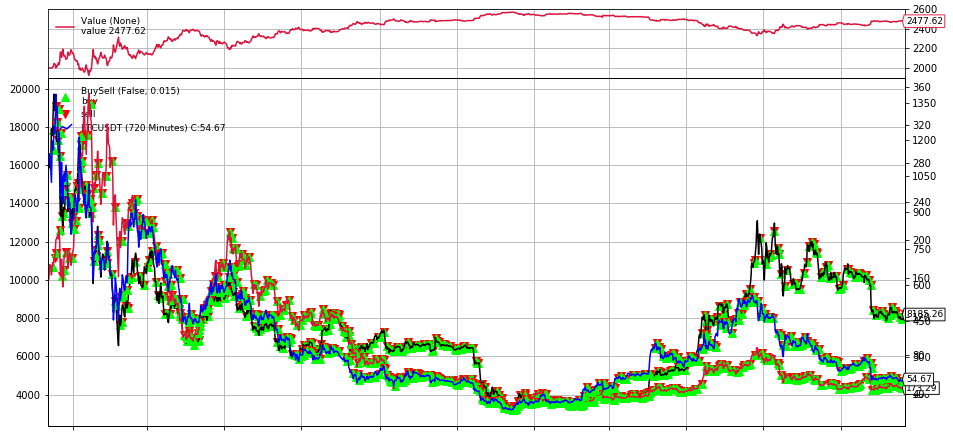

In [72]:
#Finally plot the end results
cerebro.plot(volume=False, style='line')
plt.show();

In [73]:
#Print out the final result
print('Final Portfolio Value: ${}'.format(portvalue))
print('P/L: ${}'.format(pnl))

Final Portfolio Value: $2477.6197210664277
P/L: $477.6197210664277
